#  Parte 1: Carregamento dos Dados 

In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# Carregando os dois arquivos CSV para DataFrames do pandas.
df_loja = pd.read_csv('dados_loja.csv')
df_marketing = pd.read_csv('dados_marketing.csv')
print("Arquivos CSV carregados com sucesso!")
print("\nPrimeiras 5 linhas - Dados da Loja:")
print(df_loja.head())
print("\nPrimeiras 5 linhas - Dados de Marketing:")
print(df_marketing.head())


Arquivos CSV carregados com sucesso!

Primeiras 5 linhas - Dados da Loja:
         nome  abandonou_carrinho  realizou_compra  valor_compra
0   Pessoa 83                   0                1        995.91
1   Pessoa 11                   0                1        993.35
2   Pessoa 30                   0                1        982.74
3   Pessoa 66                   1                1        962.02
4  Pessoa 158                   1                1        953.92

Primeiras 5 linhas - Dados de Marketing:
         nome canal_origem categoria_interesse  abriu_email  clicou_em_link
0   Pessoa_96     Facebook          Acessórios            0               0
1   Pessoa_16   Google Ads         Smartphones            1               0
2   Pessoa_31       E-mail         Periféricos            1               1
3  Pessoa_159     Orgânico         Smartphones            0               0
4  Pessoa_129   Google Ads         Smartphones            1               1


In [427]:
df_loja[df_loja['nome'] == 'pessoa48']

,nome,abandonou_carrinho,realizou_compra,valor_compra


# Parte 2: Tratamento e Limpeza dos Dados (ETL Básico) 

In [428]:
# Verificar se há nomes duplicados
print("\nVerificando nomes duplicados na coluna 'nome' dos DataFrames:")
print(df_loja['nome'].describe())

print("\nVerificando nomes duplicados na coluna 'nome' do DataFrame de marketing:")
print(df_marketing['nome'].describe())


Verificando nomes duplicados na coluna 'nome' dos DataFrames:
count            200
unique           194
top       Pessoa 114
freq               2
Name: nome, dtype: object

Verificando nomes duplicados na coluna 'nome' do DataFrame de marketing:
count           200
unique          200
top       Pessoa_96
freq              1
Name: nome, dtype: object


In [429]:

print("\n--- Iniciando Tratamento e Limpeza (ETL) ---")

# 2.1 Padronização da chave de junção (nome)
df_loja['nome'] = df_loja['nome'].str.strip().str.lower()
df_marketing['nome'] = df_marketing['nome'].str.strip().str.lower()
print("\nNomes padronizados para a junção.")

df_marketing['nome'] = df_marketing['nome'].str.replace('_', ' ', regex=False)
df_loja['nome'] = df_loja['nome'].str.replace('_', ' ', regex=False)  # CORRIGIDO!

df_marketing['nome'] = df_marketing['nome'].str.replace(' ', '', regex=False)
df_loja['nome'] = df_loja['nome'].str.replace(' ', '', regex=False)  # CORRIGIDO!

display(df_marketing)
display(df_loja)



--- Iniciando Tratamento e Limpeza (ETL) ---

Nomes padronizados para a junção.


,nome,canal_origem,categoria_interesse,abriu_email,clicou_em_link
0,pessoa96,Facebook,Acessórios,0,0
1,pessoa16,Google Ads,Smartphones,1,0
2,pessoa31,E-mail,Periféricos,1,1
3,pessoa159,Orgânico,Smartphones,0,0
4,pessoa129,Google Ads,Smartphones,1,1
...,...,...,...,...,...
195,pessoa107,E-mail,Acessórios,1,0
196,pessoa15,Instagram,Periféricos,0,0
197,pessoa93,Google Ads,Notebooks,0,0
198,pessoa180,Google Ads,Periféricos,0,0


,nome,abandonou_carrinho,realizou_compra,valor_compra
0,pessoa83,0,1,995.91
1,pessoa11,0,1,993.35
2,pessoa30,0,1,982.74
3,pessoa66,1,1,962.02
4,pessoa158,1,1,953.92
...,...,...,...,...
195,pessoa81,0,0,0.00
196,pessoa84,1,0,0.00
197,pessoa88,1,0,0.00
198,pessoa97,0,0,0.00


### Garantindo que a coluna valor_compra seja numérica

In [430]:

# # Convertemos a coluna para o tipo numérico (float). Erros serão convertidos para NaN (Not a Number).
df_loja['valor_compra'] = pd.to_numeric(df_loja['valor_compra'], errors='coerce')

# Os NaNs representam carrinhos abandonados. Preenchemos com 0 para os cálculos.
df_loja['valor_compra'] = df_loja['valor_compra'].fillna(0)


#  Parte 3: Cruzamento dos Dados 

In [431]:

# Unindo os dois DataFrames com base na coluna 'Nome'.
# Usamos 'outer' para manter todos os clientes de ambas as tabelas, mesmo que não haja correspondência.
df_loja.drop_duplicates(subset=['nome'], keep=False, inplace=True)
df_completo = pd.merge(df_loja, df_marketing, on='nome', how='left')
print("\nDataFrames unidos com sucesso.")
df_completo.to_csv('dados_completos.csv', index=False)



DataFrames unidos com sucesso.


In [432]:
df_completo[df_completo['nome'] == 'pessoa48']

,nome,abandonou_carrinho,realizou_compra,valor_compra,canal_origem,categoria_interesse,abriu_email,clicou_em_link
172,pessoa48,0,0,0.0,Google Ads,Periféricos,1.0,0.0



#  Parte 4: Engenharia de Atributos (Criação de Novas Colunas) 

In [433]:


df_completo = pd.read_csv('dados_completos.csv')

print("\n--- Iniciando Engenharia de Atributos ---")

# 4.1 Criando a coluna 'Status da Compra'
# Se o valor for maior que 0, o cliente comprou. Caso contrário, abandonou o carrinho.
# df_completo['Status da Compra'] = df_completo['valor_compra'].apply(lambda x: 'Comprou' if x > 0 else 'Abandonou Carrinho')

df_completo['Status da Compra'] = df_completo.apply(
    lambda row: 'Comprou' if row['realizou_compra'] == 1  
    else ('Abandonou Carrinho' if row['abandonou_carrinho'] == 1 else 'Lead'), axis=1
)

display(df_completo[['nome', 'valor_compra', 'Status da Compra']].head())


--- Iniciando Engenharia de Atributos ---


,nome,valor_compra,Status da Compra
0,pessoa83,995.91,Comprou
1,pessoa11,993.35,Comprou
2,pessoa30,982.74,Comprou
3,pessoa66,962.02,Comprou
4,pessoa158,953.92,Comprou


## 4.2 Criando a coluna 'Faixa de Valor'

In [434]:



# Segmentando os clientes que compraram em faixas de valor.
def define_faixa(valor):
    if valor == 0:
        return 'N/A' # Não se aplica a quem abandonou
    elif valor <= 400:
        return 'Baixo Valor'
    elif valor <= 800:
        return 'Médio Valor'
    else:
        return 'Alto Valor'

df_completo['Faixa de Valor'] = df_completo['valor_compra'].apply(define_faixa)
print("Coluna 'Faixa de Valor' criada.")

print("\nDataFrame final pronto para análise:")
print(df_completo.head(10))
print("\nInformações do DataFrame final:")
df_completo.info()
df_completo.to_csv('dados_final.csv', index=False)


Coluna 'Faixa de Valor' criada.

DataFrame final pronto para análise:
        nome  abandonou_carrinho  realizou_compra  valor_compra canal_origem  \
0   pessoa83                   0                1        995.91     Facebook   
1   pessoa11                   0                1        993.35       E-mail   
2   pessoa30                   0                1        982.74   Google Ads   
3   pessoa66                   1                1        962.02   Google Ads   
4  pessoa158                   1                1        953.92     Facebook   
5   pessoa46                   0                1        940.37       E-mail   
6   pessoa58                   1                1        939.85     Orgânico   
7  pessoa121                   1                1        933.35     Facebook   
8   pessoa60                   0                1        930.61   Google Ads   
9   pessoa25                   0                1        923.17     Orgânico   

  categoria_interesse  abriu_email  clicou_em_lin

# Parte 5: Construção do Dashboard (Visualização de Dados) 

In [435]:
df_completo[df_completo['nome'] == 'pessoa48']

,nome,abandonou_carrinho,realizou_compra,valor_compra,canal_origem,categoria_interesse,abriu_email,clicou_em_link,Status da Compra,Faixa de Valor
172,pessoa48,0,0,0.0,Google Ads,Periféricos,1.0,0.0,Lead,N/A


In [436]:

# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

df_final = pd.read_csv('dados_final.csv')


### Gráfico 1: Taxa de Abandono de Carrinho por Canal de Marketing

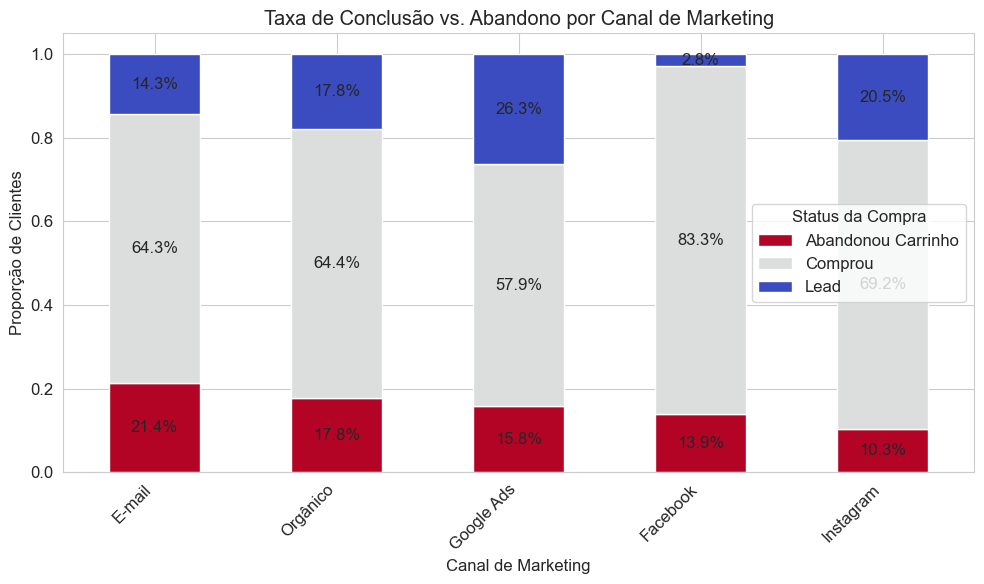

In [437]:

abandono_por_canal = df_final.groupby('canal_origem')['Status da Compra'].value_counts(normalize=True).unstack()
abandono_por_canal = abandono_por_canal.sort_values(by='Abandonou Carrinho', ascending=False)

ax1 = abandono_por_canal.plot(kind='bar', stacked=True, colormap='coolwarm_r')
plt.title('Taxa de Conclusão vs. Abandono por Canal de Marketing')
plt.ylabel('Proporção de Clientes')
plt.xlabel('Canal de Marketing')
plt.xticks(rotation=45, ha='right')
# Adicionando os rótulos de porcentagem
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax1.text(x+width/2,
                y+height/2,
                '{:.1%}'.format(height),
                horizontalalignment='center',
                verticalalignment='center')
plt.tight_layout()
plt.show()


### Gráfico 2: Receita Total Gerada por Canal de Marketing

C:\Users\natan\AppData\Local\Temp\ipykernel_25480\1756048167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=receita_por_canal.index, y=receita_por_canal.values, palette='viridis')


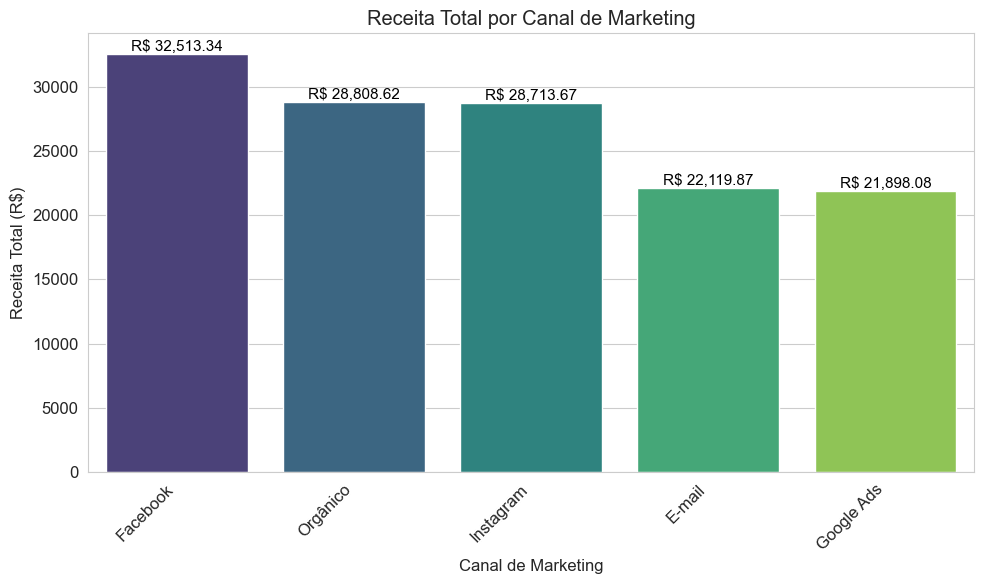

In [438]:

receita_por_canal = df_final.groupby('canal_origem')['valor_compra'].sum().sort_values(ascending=False)

plt.figure() # Criar nova figura
ax2 = sns.barplot(x=receita_por_canal.index, y=receita_por_canal.values, palette='viridis')
plt.title('Receita Total por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Receita Total (R$)')
plt.xticks(rotation=45, ha='right')
# Adicionando os rótulos de valor
for p in ax2.patches:
    ax2.annotate(f'R$ {p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.tight_layout()
plt.show()


#  AOV (Average Order Value) por Canal de Origem

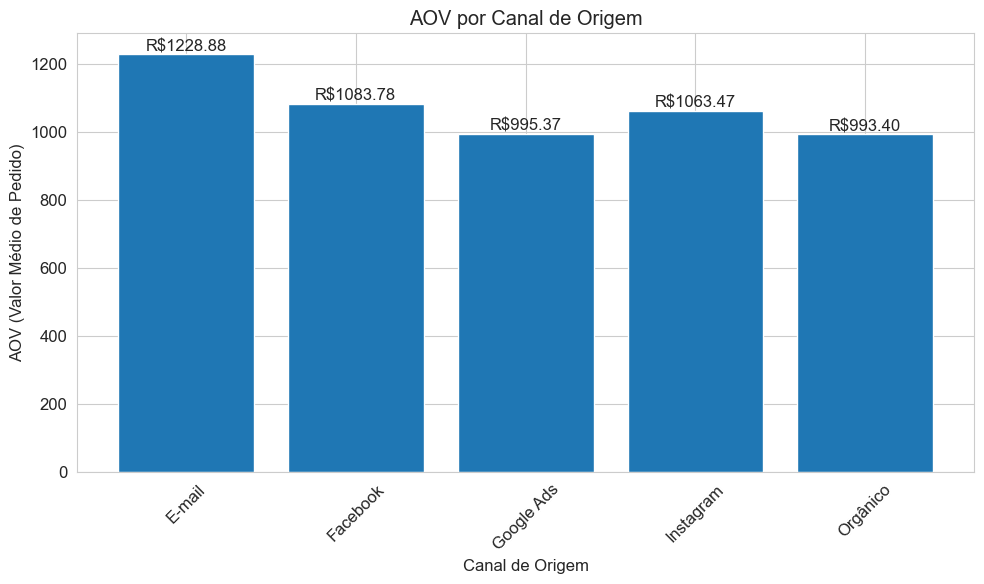

In [439]:
df_compras = df_final[df_final['Status da Compra'] == 'Comprou']
aov_canal = df_compras.groupby('canal_origem')['valor_compra'].mean().reset_index()

plt.figure()
bars = plt.bar(aov_canal['canal_origem'], aov_canal['valor_compra'])
plt.xlabel('Canal de Origem')
plt.ylabel('AOV (Valor Médio de Pedido)')
plt.title('AOV por Canal de Origem')
plt.xticks(rotation=45)
# Adiciona labels no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # posição x: centro da barra
        height,                             # posição y: topo da barra
        f'R${height:.2f}',                   # texto do label formatado
        ha='center', va='bottom'           # alinhamento horizontal e vertical
    )
plt.tight_layout()
plt.show()

### Gráfico 3: Distribuição de Clientes por Faixa de Valor (Apenas para quem comprou)

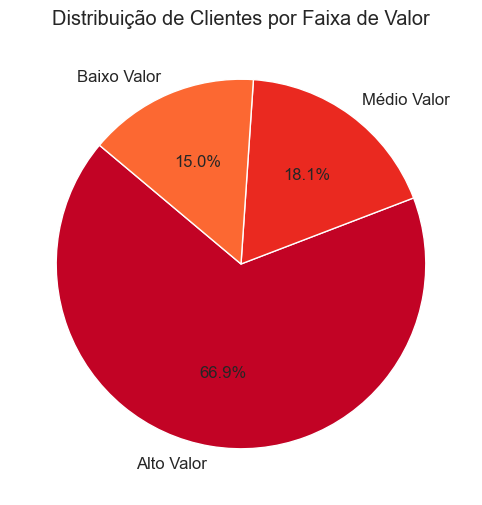

In [440]:

df_compras = df_final[df_final['Status da Compra'] == 'Comprou']
faixa_valor_counts = df_compras['Faixa de Valor'].value_counts()

plt.figure() # Criar nova figura
plt.pie(faixa_valor_counts, labels=faixa_valor_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('YlOrRd_r'))
plt.title('Distribuição de Clientes por Faixa de Valor')
plt.ylabel('') # Remove o label 'Faixa de Valor' do eixo y
plt.show()

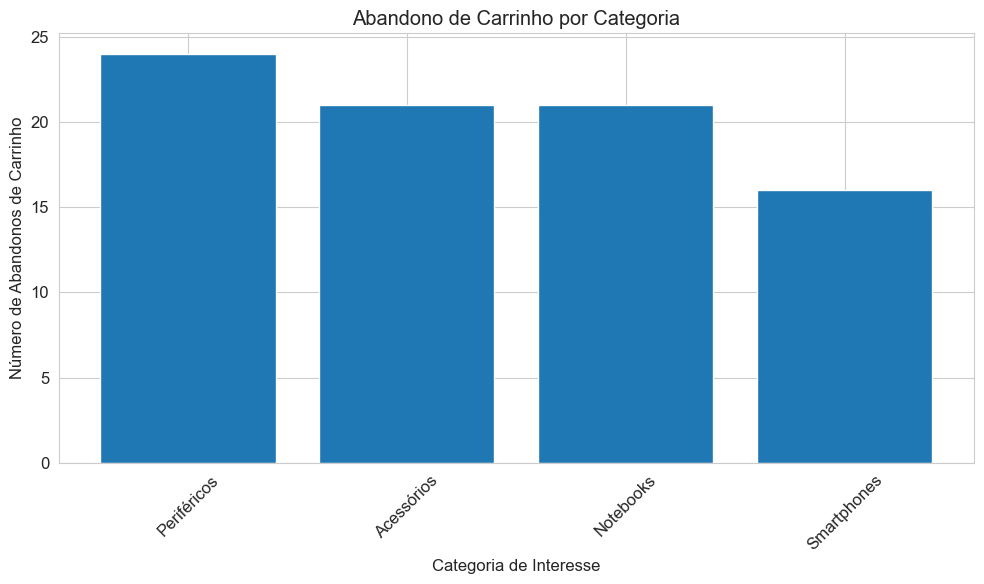

In [441]:
abandono_categoria = (
    df_final.groupby('categoria_interesse')['abandonou_carrinho']
    .sum()
    .reset_index()
    .sort_values(by='abandonou_carrinho', ascending=False)
)



# Plotar gráfico de barras
plt.figure()
plt.bar(abandono_categoria['categoria_interesse'], abandono_categoria['abandonou_carrinho'])
plt.xlabel('Categoria de Interesse')
plt.ylabel('Número de Abandonos de Carrinho')
plt.title('Abandono de Carrinho por Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [442]:
df_final['nome'].describe()

count          188
unique         188
top       pessoa83
freq             1
Name: nome, dtype: object